<a href="https://colab.research.google.com/github/bouramayaya/Cours-OC/blob/main/P3C4_interpretez_vos_clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Interprétez vos partitions - Exemple avec le dataset Iris

# 1 Preliminary

## 1.1 Context

Ce notebook est en lien le chapitre l'activité [Interprétez vos partitions](https://openclassrooms.com/fr/courses/4525281-realisez-une-analyse-exploratoire-de-donnees/5177938-interpretez-votre-partition), de la partie 3 du cours  [Réalisez une analyse exploratoire de données](https://openclassrooms.com/fr/courses/4525281-realisez-une-analyse-exploratoire-de-donnees).

Nous allons travailler sur le jeu de données iris.


<br>

------------------------------

<br>

En cas de question, n'hésitez pas à nous adresser vos remarques ou suggestions via ce [lien](https://openclassrooms.zendesk.com/hc/fr/requests/new).

<br>

-------------------------

<br>

* version : 0.0.1
* last update:  2022-08-03
* author : [Alexandre Gazagnes](https://twitter.com/Alex_Gazagnes)

<br>

## 1.2 Imports

Importons les librairies

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from sklearn import datasets

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

## 1.3 Graphics

Chargeons les librairies graphiques

In [ ]:
sns.set()

## 1.4 Data

Chargeons les données. Nous utiliserons le dataframe iris, directement présent dans `scikit-learn`. 

Il faudra travailler un peu pour pouvoir l'utiliser correctement. Ne prettez pas trop attention aux lignes ci dessous.

In [ ]:
iris = datasets.load_iris()
X = iris.data
X = pd.DataFrame(X)
X.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.columns = [i.split('(')[0].replace(" ", "_")[:-1] for i in df.columns]
X = df.copy()
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# 2 Kmeans

## 2.1 Init and fit

Nous instancions notre kmeans : 

In [ ]:
kmeans = KMeans(n_clusters=3)

Nous effectuons l'entrainement : 

In [ ]:
kmeans.fit(X)

KMeans(n_clusters=3)

## 2.2. Labels and centroids

Enregistrons nos labels : 

In [ ]:
labels = kmeans.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

Ansi que nos centroides : 

In [ ]:
centroids = kmeans.cluster_centers_
centroids

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

# 3 PCA + projection

Nous allons faire notre projetcion en utlisant une PCA.

## 3.1 Scaling

Commencons par le scaling des données.
On instancie notre scaler : 

In [ ]:
scaler = StandardScaler()

On entraine et on transforme dans la même ligne : 

In [ ]:
X_scaled = scaler.fit_transform(X)
X_scaled[:10]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

## 3.2 PCA

On peut faire notre PCA. On instancie un objet et on entraine notre PCA : 

In [ ]:
pca = PCA(n_components=4)
pca.fit(X_scaled)

PCA(n_components=4)

On peut calulcer notre variance cumulée : 

In [ ]:
pca.explained_variance_ratio_.cumsum()

array([0.72962445, 0.95813207, 0.99482129, 1.        ])

On peut effectuer une rapide visualisation : 

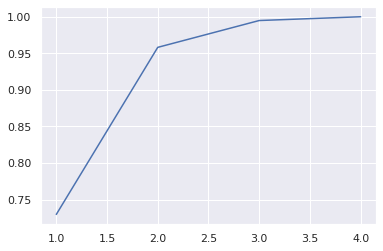

In [ ]:
plt.plot(range(1,5), pca.explained_variance_ratio_.cumsum())
plt.xlabel = "n_components"
plt.ylabel = "% of variance"

## 3.2 Projection

Nous allons maintenant calculer les coordonnées de nos individus dans le nouvel espace projectif : 

In [ ]:
X_proj = pca.transform(X_scaled)
X_proj[:10]

array([[-2.26470281,  0.4800266 , -0.12770602, -0.0241682 ],
       [-2.08096115, -0.67413356, -0.23460885, -0.10300677],
       [-2.36422905, -0.34190802,  0.04420148, -0.02837705],
       [-2.29938422, -0.59739451,  0.09129011,  0.06595556],
       [-2.38984217,  0.64683538,  0.0157382 ,  0.03592281],
       [-2.07563095,  1.48917752,  0.02696829, -0.00660818],
       [-2.44402884,  0.0476442 ,  0.3354704 ,  0.03677556],
       [-2.23284716,  0.22314807, -0.0886955 ,  0.0246121 ],
       [-2.33464048, -1.11532768,  0.14507686,  0.02685922],
       [-2.18432817, -0.46901356, -0.25376557,  0.03989929]])

Pour plus de clareté, nous allons créer un DataFrame : 

In [ ]:
X_proj = pd.DataFrame(X_proj, columns = ["F1", "F2", "F3", "F4"])
X_proj[:10]

,F1,F2,F3,F4
0,-2.264703,0.480027,-0.127706,-0.024168
1,-2.080961,-0.674134,-0.234609,-0.103007
2,-2.364229,-0.341908,0.044201,-0.028377
3,-2.299384,-0.597395,0.091290,0.065956
4,-2.389842,0.646835,0.015738,0.035923
5,-2.075631,1.489178,0.026968,-0.006608
6,-2.444029,0.047644,0.335470,0.036776
7,-2.232847,0.223148,-0.088695,0.024612
8,-2.334640,-1.115328,0.145077,0.026859
9,-2.184328,-0.469014,-0.253766,0.039899


Nous devons également calculer nos centroides.
Avant cela il faut les scaler.

-- **ATTENTION** -- : Pour le scaling, il faut prendre le scaler qui a été `fit` sur les données d'origines, et le `transform`uniquement : 

In [ ]:
centroids_scaled = scaler.fit_transform(centroids)
centroids_scaled

array([[-1.21289548,  1.24179931, -1.34540432, -1.32792934],
       [-0.02336446, -1.20694645,  0.29532251,  0.24271325],
       [ 1.23625994, -0.03485286,  1.05008182,  1.08521609]])

Créons un DataFrame pour plus de clareté : 

In [ ]:
centroids_proj = pca.transform(centroids_scaled)
centroids_proj = pd.DataFrame(centroids_proj, 
                              columns = ["F1", "F2", "F3", "F4"], 
                              index=["cluster_0", "cluster_1", "cluster_2"])
centroids_proj

,F1,F2,F3,F4
cluster_0,-2.497454,0.566934,0.142745,0.087314
cluster_1,0.621421,-1.099706,-0.082224,-0.033363
cluster_2,1.876033,0.532772,-0.060521,-0.053951


## 3.3 Simple Visualisation

On peut maintenant passer à la visualisation. Commencons par quelque chose de très simple : 

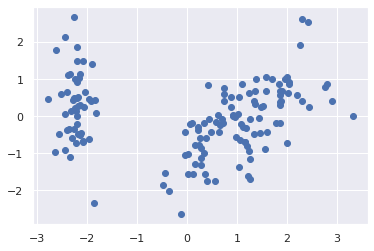

In [ ]:
plt.scatter(X_proj.iloc[:, 0], X_proj.iloc[:, 1])

Simple et efficace !
Faisons un peu mieux. 
Pour ce faire, nous allons colorier les points en fonction de leurs labels : 

Text(0, 0.5, 'F2')

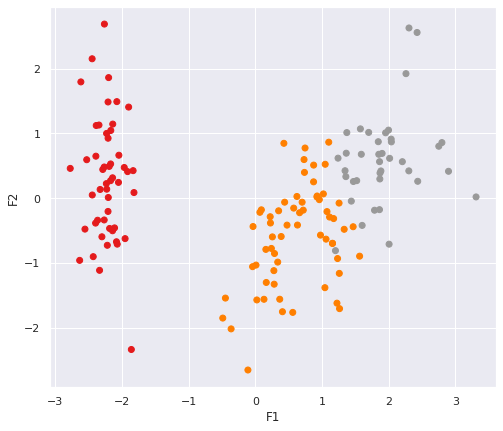

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(8,7))

ax.scatter(X_proj.iloc[:, 0], X_proj.iloc[:, 1], c= labels, cmap="Set1")

ax.set_xlabel("F1")
ax.set_ylabel("F2")


Nous verrons plus tard comment faire encore mieux...
Pour l'instant intéressons nous aux centroides. Nous allons afficher les points mais en les mettant en transparence grace au parametre `alpha`. 
Ensuite, nous allons afficher en carré noir les centroids grace au parametre `marker` et `c` : 

Text(0, 0.5, 'F2')

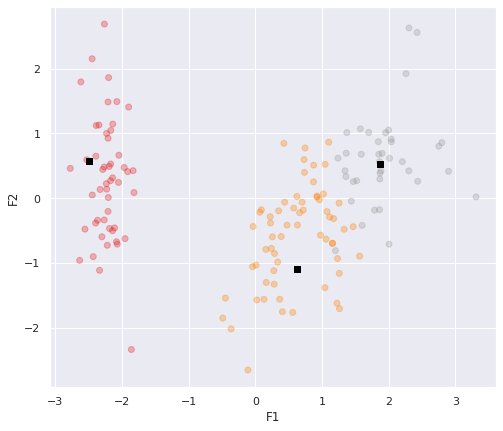

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(8,7))

ax.scatter(X_proj.iloc[:, 0], X_proj.iloc[:, 1], c= labels, cmap="Set1", alpha=0.3)
ax.scatter(centroids_proj.iloc[:, 0], centroids_proj.iloc[:, 1],  marker="s", c="black" )

ax.set_xlabel("F1")
ax.set_ylabel("F2")

Enfin amusons nous à faire une visualisation en 3 dimensions : 

Text(0.5, 0, 'F3')

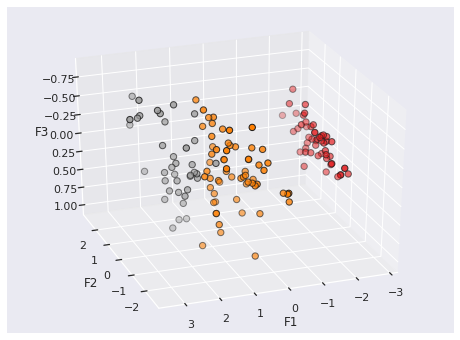

In [ ]:
fig= plt.figure(1, figsize=(8, 6))

ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)
ax.scatter(
    X_proj.iloc[:, 0],
    X_proj.iloc[:, 1],
    X_proj.iloc[:, 2],
    c=labels,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40)

ax.set_xlabel("F1")
ax.set_ylabel("F2")
ax.set_zlabel("F3")


Encore mieux, grace à `plotly` : 

In [ ]:
fig = px.scatter_3d(x=X_proj.iloc[:,0], y=X_proj.iloc[:,1], z=X_proj.iloc[:, 2],
              color=labels)
fig.show()

## 3.4 Advanced Visualisation

Nous allons maintenant écrire une fonction qui fait le graphique le plus beau et le plus clair possible.

Repartons de notre premier graphique : 

Text(0, 0.5, 'F2')

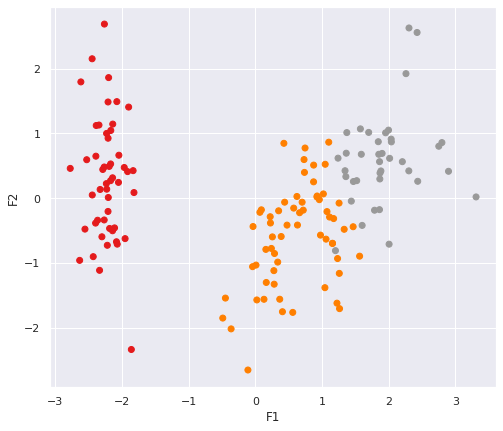

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(8,7))

ax.scatter(X_proj.iloc[:, 0], X_proj.iloc[:, 1], c= labels, cmap="Set1")

ax.set_xlabel("F1")
ax.set_ylabel("F2")


On peut rajouter le % de variance de chaque axe, et transformer notre `pd.DataFrame` en un `np.array` pour ne plus avoir à utiliser la méthode `iloc` : 

Text(0, 0.5, 'F2 (22.9%)')

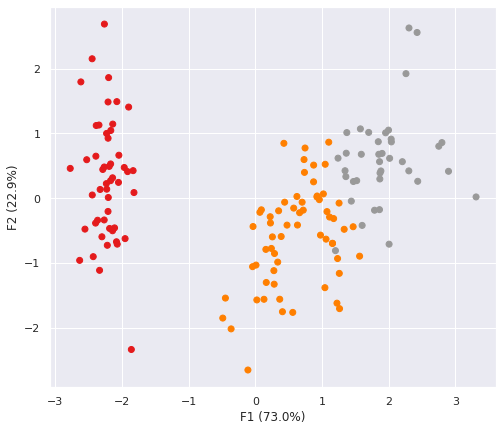

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(8,7))

#Transforme notre DataFrame d'origine
X_ = np.array(X_proj)

# On enregistre nos axes x, y
x, y = axis = (0,1 )

# plus besoin d'utiliser iloc
ax.scatter(X_[:, 0], X_[:, 1], c= labels, cmap="Set1")

# nom des axes, avec le pourcentage d'inertie expliqué
ax.set_xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
ax.set_ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

On va rajouter un titre et tracer nos axes : 

Text(0.5, 1.0, 'Projection des individus (sur F1 et F2)')

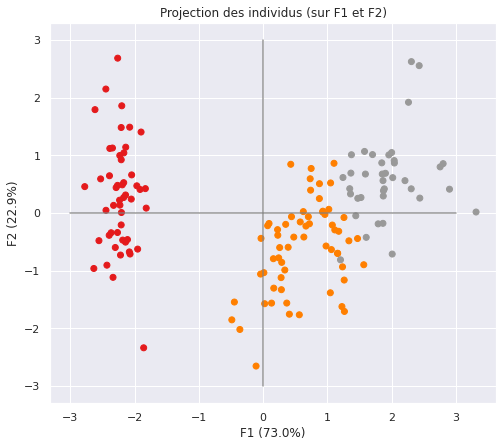

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(8,7))

#Transforme notre DataFrame d'origine
X_ = np.array(X_proj)

# On enregistre nos axes x, y
x, y = axis = (0,1 )

# plus besoin d'utiliser iloc
ax.scatter(X_[:, 0], X_[:, 1], c= labels, cmap="Set1")

# nom des axes, avec le pourcentage d'inertie expliqué
ax.set_xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
ax.set_ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

# affichage des lignes horizontales et verticales
plt.plot([-3, 3], [0, 0], color='grey', alpha=0.8)
plt.plot([0,0], [-3, 3], color='grey', alpha=0.8)

# on rajoute un tritre
plt.title("Projection des individus (sur F{} et F{})".format(x+1, y+1), )

On peut ensuite borner `xlim` et `ylim`, et étendre nos axes. On en profite pour rajouter le `label` à nos points : 

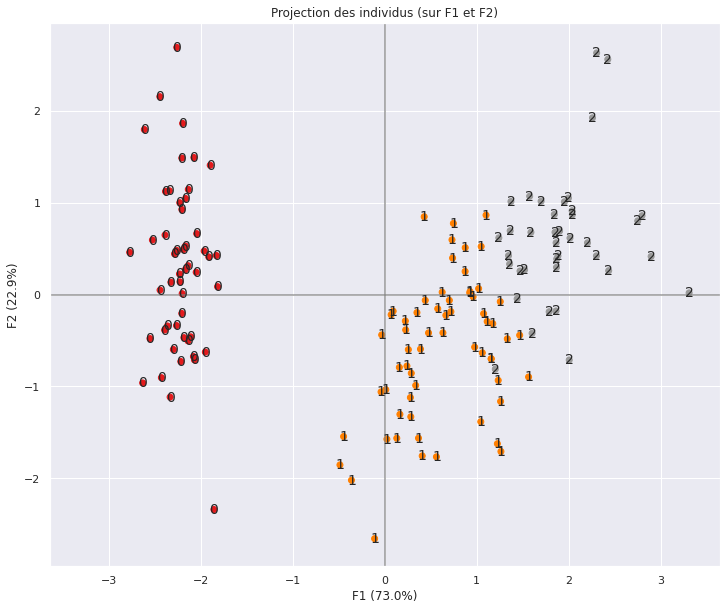

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(12,10))

#Transforme notre DataFrame d'origine
X_ = np.array(X_proj)

# On enregistre nos axes x, y
x, y = axis = (0,1 )

# plus besoin d'utiliser iloc
ax.scatter(X_[:, 0], X_[:, 1], c= labels, cmap="Set1")

# nom des axes, avec le pourcentage d'inertie expliqué
ax.set_xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
ax.set_ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

# valeur x max et y max
x_max = np.abs(X_[:, x]).max() *1.1
y_max = np.abs(X_[:, y]).max() *1.1

# affichage des lignes horizontales et verticales
plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

# on borne x et y 
ax.set_xlim(left= -x_max, right=x_max)
ax.set_ylim(bottom= -y_max, top=y_max)

# un tritre
plt.title("Projection des individus (sur F{} et F{})".format(x+1, y+1), )

# affichage des labels des points
for i,(x,y) in enumerate(X_[:,[x,y]]):
  ax.text(x, y, labels[i], fontsize='14', ha='center',va='center') 

plt.show()

Ecrivons une fonction : 

In [ ]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en un df
    X_ = pd.DataFrame(X_projected)
    
    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # On définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    
    # On rajoute la color, les clusters et les labels à X_
    X_["clusters"] =  clusters if clusters is not None else "None" 
    X_["labels"] =  labels if labels is not None else "None"
    c_unique_list = X_["clusters"].sort_values().unique()
    c_dict = {j:i+1 for i, j in enumerate(c_unique_list)}
    X_["colors"] = X_["clusters"].apply(lambda i : c_dict[i])

    # Pour chaque couleur / cluster
    for c in sorted(X_.clusters.unique()) : 
        # On selectionne le sous DF
        sub_X =X_.loc[X_.clusters == c, : ]

        # Clusters and color
        cluster = sub_X.clusters.iloc[0]
        color = sub_X.colors.iloc[0]

        # On affiche les points
        ax.scatter(    sub_X.iloc[:, x], 
                        sub_X.iloc[:, y], 
                        alpha=alpha, 
                        label = cluster ,
                        cmap="Set1", 
                        marker=marker)
        
    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_.iloc[:, x]).max() *1.1
    y_max = np.abs(X_.iloc[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if labels : 
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y, labels[i], fontsize='14', ha='center',va='center') 

    # Titre, legend et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    if clusters is not None: 
        plt.legend()
    plt.show()


Testons cette fonction. Tout d'abord le mode basique : 

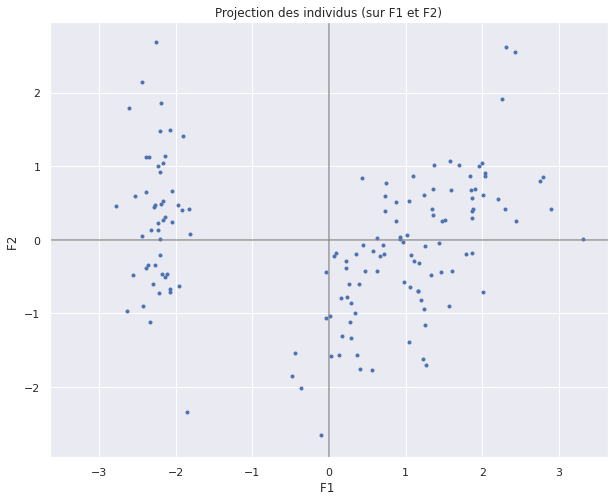

In [ ]:
display_factorial_planes(X_proj, x_y=(0,1))

Essayons un peu plus compliqué : 

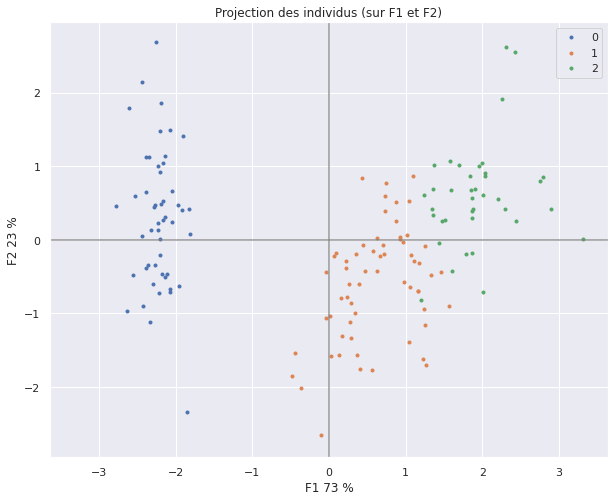

In [ ]:
display_factorial_planes(X_proj,  
                         x_y=(0,1), 
                         clusters=labels, 
                         pca=pca, 
                         figsize=(10, 8), 
                         alpha=1 )

Amusons nous un peu : 

In [ ]:
dd = {0:"a", 1:"b", 2:"c"}
labels_ = [dd[int(i)] for i in labels]
labels_[:10]

['a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a']

In [ ]:
labels[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

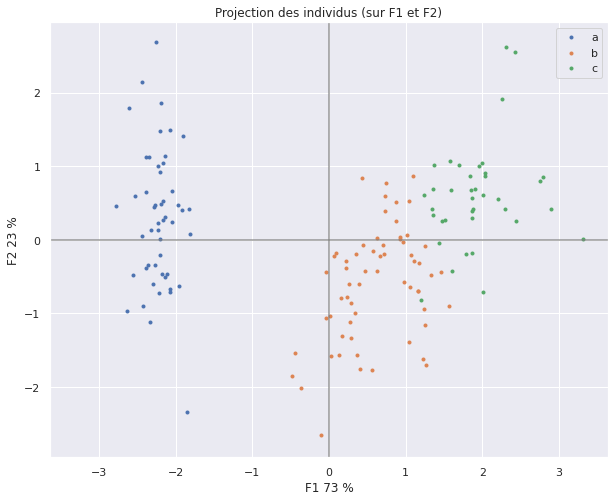

In [ ]:
display_factorial_planes(X_proj,  
                         x_y=(0,1), 
                         clusters=labels_, 
                         pca=pca, 
                         figsize=(10, 8), 
                         alpha=1 )

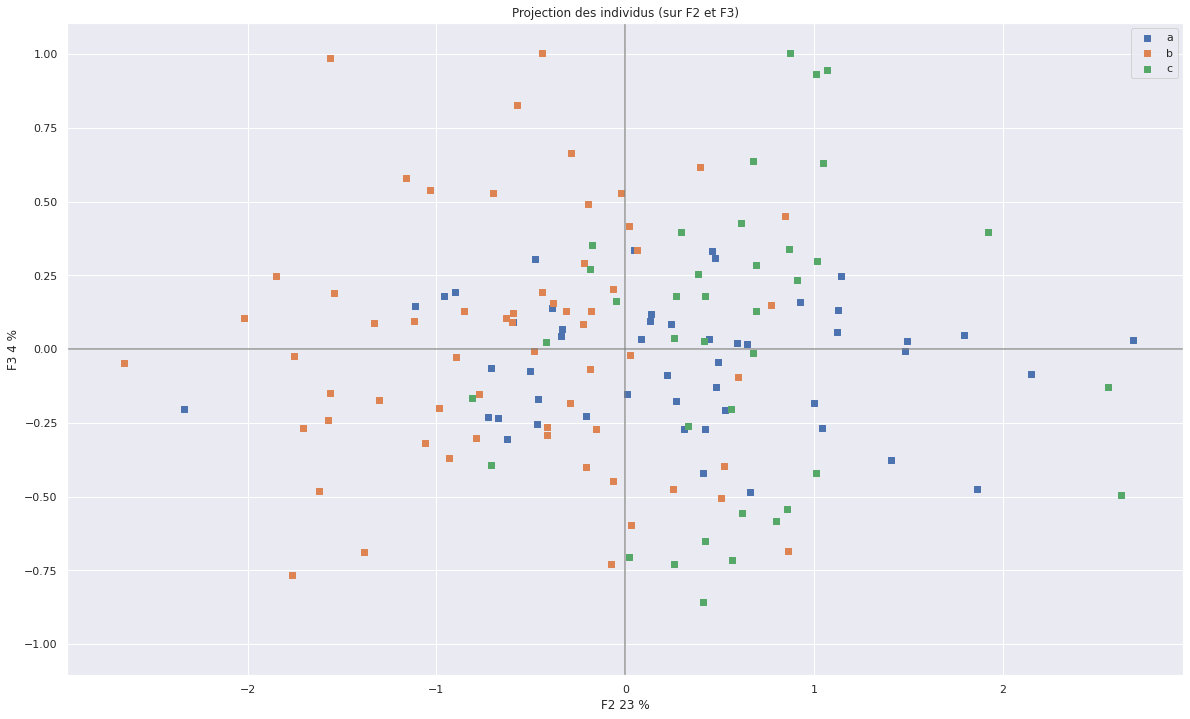

In [ ]:
display_factorial_planes(X_proj,  
                         x_y=(1,2), 
                         clusters=labels_, 
                         pca=pca, 
                         figsize=(20,12), 
                         alpha=1, 
                         marker ="s")

-- **ATTENTION** -- 

On ne peut pas passer les paramètres (3,4) pour la variable axis. 
Comme on compte à partir de 0, si on veut l'axe 3 et 4 il faut passer les variables (2,3) :

index 4 is out of bounds for axis 0 with size 4


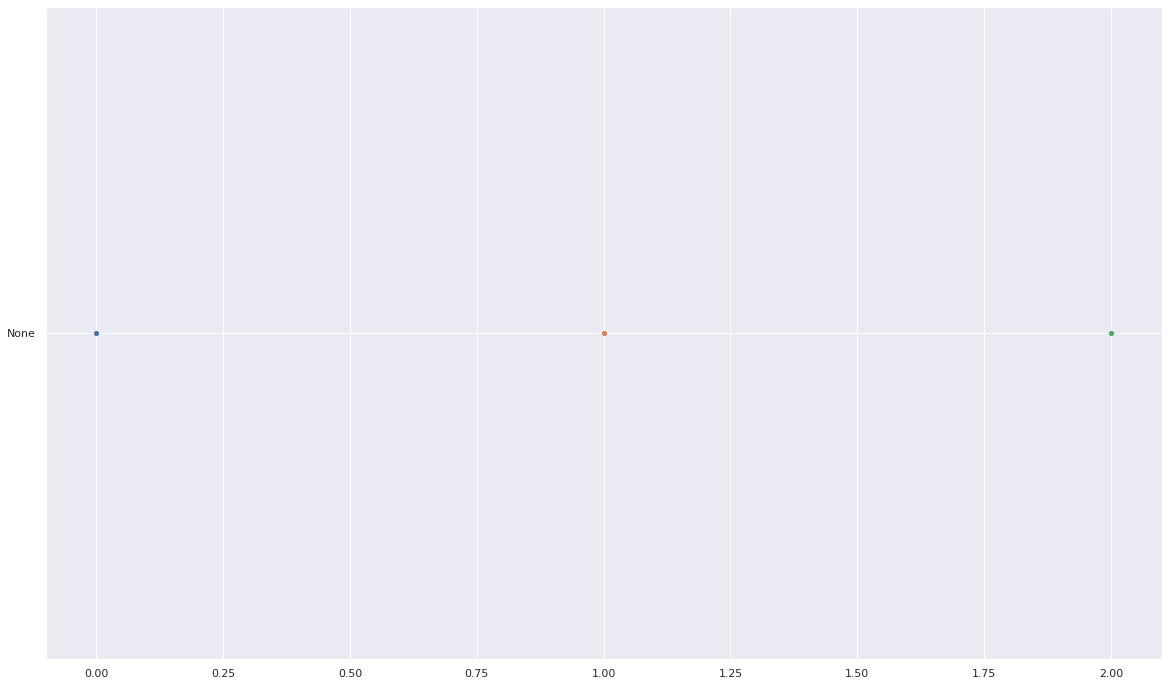

In [ ]:
try : 
    display_factorial_planes(X_proj,  
                            x_y=(4,5), 
                            clusters=labels, 
                            pca=pca, 
                            figsize=(10,8), 
                            alpha=1 )
except Exception as e : 
    print(e)

# 4 TSNE + projection

## 4.1 TSNE

Comme l'ACP, on instancie le TSNE.

Le TSNE est une méthode plus complexe que l'ACP. Elle prend notamment en paramètres le `learning_rate`, la `perplexity` le `n_iter`.

C'est une méthode non déterminste. 

Vous trouverez plus d'information sur cette [page](https://www.google.com/search?q=TSNE+sklearn). Le 1er lien devrait etre le bon :) 

In [ ]:
tsne = TSNE(n_components=2, learning_rate=30, init='random', perplexity=30, n_iter=300)
tsne

TSNE(init='random', learning_rate=30, n_iter=300, perplexity=30)

On fit et transforme notre `X_scaled` : 

In [ ]:
X_tsne = tsne.fit_transform(X_scaled)    
X_tsne[:10]

array([[-2.0163713, 10.4652195],
       [-2.3082423,  7.4014874],
       [-2.9446747,  8.299596 ],
       [-3.044463 ,  7.686301 ],
       [-2.023187 , 11.007636 ],
       [-1.3543326, 12.4642105],
       [-3.2027748,  9.298394 ],
       [-2.3227787,  9.744343 ],
       [-2.906424 ,  6.8318944],
       [-2.3093994,  7.911807 ]], dtype=float32)

## 4.2 Simple visualisation

On peut maintenant faire une visualisation 'simple'

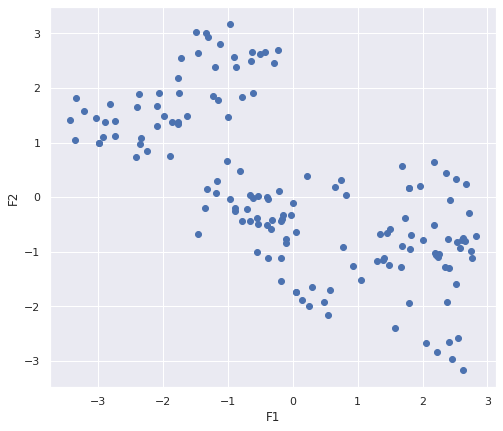

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(8,7))
ax.scatter(X_tsne[:, 0], X_tsne[:, 1])
ax.set_xlabel("F1")
ax.set_ylabel("F2")
plt.show()

La forme est différente, mais le résultat est intéressant.

-- **ATTENTION** -- 

Comme le TSNE est une méthode non déterministe, le résultat peut changer d'une fois à l'autre. 

Essayons maintenant en 3 dimensions : 

In [ ]:
tsne = TSNE(n_components=3, learning_rate=30, init='random', perplexity=30, n_iter=300)
X_tsne = tsne.fit_transform(X_scaled)    
X_tsne[:10]

array([[-0.11778388, -0.38097703, -7.590968  ],
       [ 0.8752927 , -0.7226693 , -5.0657287 ],
       [ 1.0621033 , -0.15082741, -5.8566165 ],
       [ 1.5594671 , -0.40809667, -5.5362196 ],
       [-0.5681952 , -0.02181349, -7.6936426 ],
       [-0.9107435 ,  0.31308177, -9.138096  ],
       [ 0.22704789,  0.36314002, -6.303743  ],
       [ 0.20590197, -0.39509475, -6.98986   ],
       [ 1.5712742 , -0.2423015 , -4.7031164 ],
       [ 1.1222742 , -0.9304941 , -5.6812487 ]], dtype=float32)

Text(0.5, 0, 'F3')

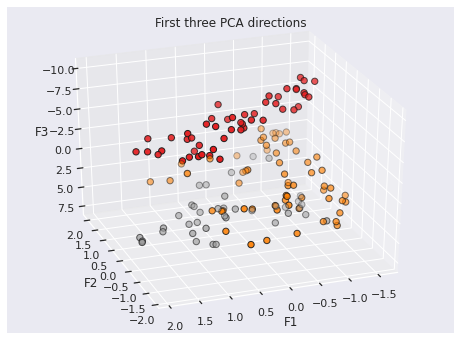

In [ ]:
fig= plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)
ax.scatter(
    X_tsne[:, 0],
    X_tsne[:, 1],
    X_tsne[:, 2],
    c=labels,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40)

ax.set_title("First three PCA directions")
ax.set_xlabel("F1")
ax.set_ylabel("F2")
ax.set_zlabel("F3")

In [ ]:
fig = px.scatter_3d(x=X_tsne[:,0], y=X_tsne[:,1], z=X_tsne[:, 2],
              color=labels)
fig.show()

## 4.3 Advanced visualisation

Pour cette 2ème partie de visualisation TSNE, nous allons jouer un peu.

Nous allons essayer plusieurs TSNE pour différents paramètres. 

On commence par définir une fonction : 

In [ ]:
def compute_tsne(n_components, learning_rate="auto", perplexity=30) : 

    tsne = TSNE(n_components=n_components, learning_rate=learning_rate, init='random', perplexity=30, n_iter=300)
    X_tsne = tsne.fit_transform(X_scaled)
    return X_tsne

On définit ensuite une liste vide et une liste de valeurs pour le learning rate : 

In [ ]:
tsne_list = []
lr_list = [3, 10, 30, 50, 100, 150, 200, 300, 500]

Pour chaque valeur de learning rate on calcule une matrice de points projetés : 

In [ ]:
for lr in lr_list : 
  tsne_list.append(compute_tsne(n_components=2,learning_rate=lr ))

Nous allons maintenant afficher cela dans une grille de `3*3` : 

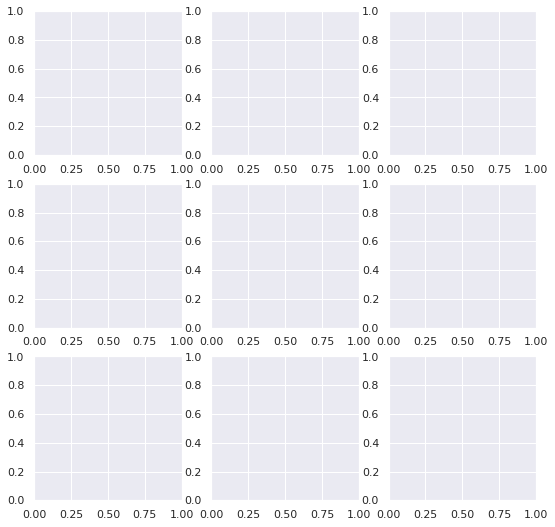

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(9,9))

axs = axs.flatten()

Cela nous donne : 

[]

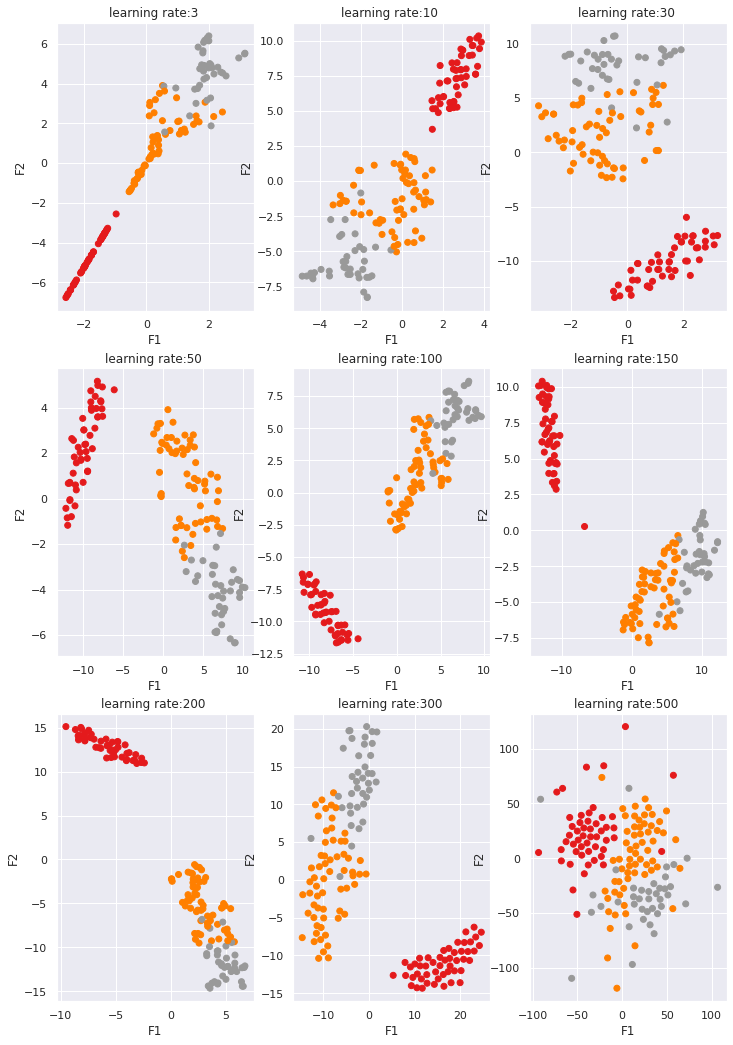

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(12,18))
axs = axs.flatten()

for n, x_tsne, ax in zip(lr_list, tsne_list, axs) : 
    ax.scatter(x_tsne[:, 0], x_tsne[:, 1], c= labels, cmap="Set1")
    ax.set_xlabel("F1")
    ax.set_ylabel("F2")
    ax.set_title(f"learning rate:{n} ")

plt.plot()

On peut voire que, en effet, en fonction du paramètre `learning_rate`la projection des points, et donc la visualisation, change beaucoup ! 